In [1]:
import keras
from keras.layers import Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import UpSampling2D
from keras.layers import Concatenate
from keras.layers import Lambda 
from keras.utils import to_categorical
import tensorflow as tf

from keras.layers import Reshape

from keras import backend as K
from keras import regularizers, optimizers
%matplotlib inline

Using TensorFlow backend.


In [2]:
import scipy.io as scio
import numpy as np    
import os
import matplotlib.pyplot as plt
import math
import re
from scipy.misc import imsave
from scipy import ndimage, misc
from numpy import unravel_index
from operator import sub

In [3]:
def atoi(text) : 
    return int(text) if text.isdigit() else text

In [4]:
def natural_keys(text) :
    return [atoi(c) for c in re.split('(\d+)', text)]

In [7]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("/home/guru/Desktop/Cancer-Detection-and-Segmentation/melanoma/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [8]:
filenames

['ISIC_0000002.jpg',
 'ISIC_0000004.jpg',
 'ISIC_0000013.jpg',
 'ISIC_0000022.jpg',
 'ISIC_0000026.jpg',
 'ISIC_0000029.jpg',
 'ISIC_0000030.jpg',
 'ISIC_0000031.jpg',
 'ISIC_0000035.jpg',
 'ISIC_0000036.jpg',
 'ISIC_0000040.jpg',
 'ISIC_0000043.jpg',
 'ISIC_0000046.jpg',
 'ISIC_0000049.jpg',
 'ISIC_0000054.jpg',
 'ISIC_0000056.jpg',
 'ISIC_0000074.jpg',
 'ISIC_0000077.jpg',
 'ISIC_0000078.jpg',
 'ISIC_0000139.jpg',
 'ISIC_0000140.jpg',
 'ISIC_0000141.jpg',
 'ISIC_0000142.jpg',
 'ISIC_0000143.jpg',
 'ISIC_0000145.jpg',
 'ISIC_0000146.jpg',
 'ISIC_0000147.jpg',
 'ISIC_0000148.jpg',
 'ISIC_0000149.jpg',
 'ISIC_0000150.jpg',
 'ISIC_0000151.jpg',
 'ISIC_0000152.jpg',
 'ISIC_0000153.jpg',
 'ISIC_0000154.jpg',
 'ISIC_0000155.jpg',
 'ISIC_0000156.jpg',
 'ISIC_0000157.jpg',
 'ISIC_0000159.jpg',
 'ISIC_0000160.jpg',
 'ISIC_0000161.jpg',
 'ISIC_0000162.jpg',
 'ISIC_0000163.jpg',
 'ISIC_0000164.jpg',
 'ISIC_0000165.jpg',
 'ISIC_0000166.jpg',
 'ISIC_0000167.jpg',
 'ISIC_0000169.jpg',
 'ISIC_000017

In [9]:
melanoma_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    image = misc.imresize(image,(256,256))
    melanoma_images.append(image)
    print(filename)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


ISIC_0000002.jpg
ISIC_0000004.jpg
ISIC_0000013.jpg
ISIC_0000022.jpg
ISIC_0000026.jpg
ISIC_0000029.jpg
ISIC_0000030.jpg
ISIC_0000031.jpg
ISIC_0000035.jpg
ISIC_0000036.jpg
ISIC_0000040.jpg
ISIC_0000043.jpg
ISIC_0000046.jpg
ISIC_0000049.jpg
ISIC_0000054.jpg
ISIC_0000056.jpg
ISIC_0000074.jpg
ISIC_0000077.jpg
ISIC_0000078.jpg
ISIC_0000139.jpg
ISIC_0000140.jpg
ISIC_0000141.jpg
ISIC_0000142.jpg
ISIC_0000143.jpg
ISIC_0000145.jpg
ISIC_0000146.jpg
ISIC_0000147.jpg
ISIC_0000148.jpg
ISIC_0000149.jpg
ISIC_0000150.jpg
ISIC_0000151.jpg
ISIC_0000152.jpg
ISIC_0000153.jpg
ISIC_0000154.jpg
ISIC_0000155.jpg
ISIC_0000156.jpg
ISIC_0000157.jpg
ISIC_0000159.jpg
ISIC_0000160.jpg
ISIC_0000161.jpg
ISIC_0000162.jpg
ISIC_0000163.jpg
ISIC_0000164.jpg
ISIC_0000165.jpg
ISIC_0000166.jpg
ISIC_0000167.jpg
ISIC_0000169.jpg
ISIC_0000171.jpg
ISIC_0000172.jpg
ISIC_0000174.jpg
ISIC_0000176.jpg
ISIC_0000276.jpg
ISIC_0000277.jpg
ISIC_0000278.jpg
ISIC_0000281.jpg
ISIC_0000282.jpg
ISIC_0000283.jpg
ISIC_0000285.jpg
ISIC_0000288.j

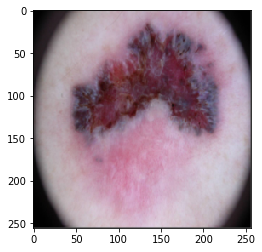

In [10]:
plt.imshow(melanoma_images[6])

In [11]:
root = "/home/guru/Desktop/Cancer-Detection-and-Segmentation/gt/"

In [12]:
ground_truth_images_melanoma = []
for filename in filenames :
    filename = filename[0:-4] + "_segmentation.png"
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    image = misc.imresize(image,(256,256))
    ground_truth_images_melanoma.append(image)
    print(filename)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


ISIC_0000002_segmentation.png
ISIC_0000004_segmentation.png
ISIC_0000013_segmentation.png
ISIC_0000022_segmentation.png
ISIC_0000026_segmentation.png
ISIC_0000029_segmentation.png
ISIC_0000030_segmentation.png
ISIC_0000031_segmentation.png
ISIC_0000035_segmentation.png
ISIC_0000036_segmentation.png
ISIC_0000040_segmentation.png
ISIC_0000043_segmentation.png
ISIC_0000046_segmentation.png
ISIC_0000049_segmentation.png
ISIC_0000054_segmentation.png
ISIC_0000056_segmentation.png
ISIC_0000074_segmentation.png
ISIC_0000077_segmentation.png
ISIC_0000078_segmentation.png
ISIC_0000139_segmentation.png
ISIC_0000140_segmentation.png
ISIC_0000141_segmentation.png
ISIC_0000142_segmentation.png
ISIC_0000143_segmentation.png
ISIC_0000145_segmentation.png
ISIC_0000146_segmentation.png
ISIC_0000147_segmentation.png
ISIC_0000148_segmentation.png
ISIC_0000149_segmentation.png
ISIC_0000150_segmentation.png
ISIC_0000151_segmentation.png
ISIC_0000152_segmentation.png
ISIC_0000153_segmentation.png
ISIC_00001

ISIC_0013865_segmentation.png
ISIC_0013874_segmentation.png
ISIC_0013936_segmentation.png
ISIC_0013969_segmentation.png
ISIC_0013972_segmentation.png
ISIC_0013975_segmentation.png
ISIC_0013984_segmentation.png
ISIC_0013986_segmentation.png
ISIC_0013995_segmentation.png
ISIC_0013997_segmentation.png
ISIC_0014013_segmentation.png
ISIC_0014044_segmentation.png
ISIC_0014049_segmentation.png
ISIC_0014061_segmentation.png
ISIC_0014062_segmentation.png
ISIC_0014072_segmentation.png
ISIC_0014076_segmentation.png
ISIC_0014079_segmentation.png
ISIC_0014082_segmentation.png
ISIC_0014088_segmentation.png
ISIC_0014092_segmentation.png
ISIC_0014099_segmentation.png
ISIC_0014108_segmentation.png
ISIC_0014127_segmentation.png
ISIC_0014132_segmentation.png
ISIC_0014133_segmentation.png
ISIC_0014136_segmentation.png
ISIC_0014144_segmentation.png
ISIC_0014151_segmentation.png
ISIC_0014156_segmentation.png
ISIC_0014157_segmentation.png
ISIC_0014163_segmentation.png
ISIC_0014171_segmentation.png
ISIC_00141

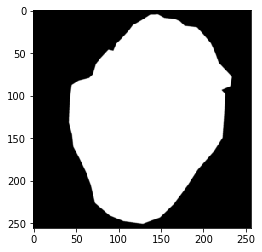

In [14]:
plt.imshow(ground_truth_images_melanoma[6], cmap = "gray")

In [15]:
np.unique(ground_truth_images_melanoma[6])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  56,  57,  58,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 18

In [16]:
ground_truth_images_melanoma[6].shape

(256, 256)

In [19]:
import cv2

In [20]:
ret,thresh_img = cv2.threshold(ground_truth_images_melanoma[6],127,255,cv2.THRESH_BINARY)

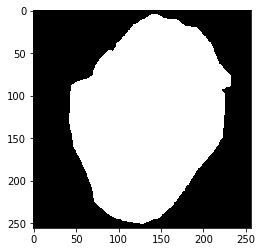

In [23]:
plt.imshow(thresh_img,cmap = "gray")

In [24]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("/home/guru/Desktop/Cancer-Detection-and-Segmentation/gt/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [26]:
ground_truth_images_melanoma = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath, mode = 'L')
    image = misc.imresize(image,(256,256))
    ret,image = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    ground_truth_images_melanoma.append(image)
    print(filename)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


ISIC_0000000_segmentation.png
ISIC_0000001_segmentation.png
ISIC_0000002_segmentation.png
ISIC_0000003_segmentation.png
ISIC_0000004_segmentation.png
ISIC_0000006_segmentation.png
ISIC_0000007_segmentation.png
ISIC_0000008_segmentation.png
ISIC_0000009_segmentation.png
ISIC_0000010_segmentation.png
ISIC_0000011_segmentation.png
ISIC_0000012_segmentation.png
ISIC_0000013_segmentation.png
ISIC_0000014_segmentation.png
ISIC_0000015_segmentation.png
ISIC_0000016_segmentation.png
ISIC_0000017_segmentation.png
ISIC_0000018_segmentation.png
ISIC_0000019_segmentation.png
ISIC_0000020_segmentation.png
ISIC_0000021_segmentation.png
ISIC_0000022_segmentation.png
ISIC_0000023_segmentation.png
ISIC_0000024_segmentation.png
ISIC_0000025_segmentation.png
ISIC_0000026_segmentation.png
ISIC_0000027_segmentation.png
ISIC_0000028_segmentation.png
ISIC_0000029_segmentation.png
ISIC_0000030_segmentation.png
ISIC_0000031_segmentation.png
ISIC_0000032_segmentation.png
ISIC_0000034_segmentation.png
ISIC_00000

ISIC_0000341_segmentation.png
ISIC_0000342_segmentation.png
ISIC_0000343_segmentation.png
ISIC_0000344_segmentation.png
ISIC_0000345_segmentation.png
ISIC_0000346_segmentation.png
ISIC_0000347_segmentation.png
ISIC_0000348_segmentation.png
ISIC_0000349_segmentation.png
ISIC_0000350_segmentation.png
ISIC_0000351_segmentation.png
ISIC_0000352_segmentation.png
ISIC_0000353_segmentation.png
ISIC_0000354_segmentation.png
ISIC_0000355_segmentation.png
ISIC_0000357_segmentation.png
ISIC_0000358_segmentation.png
ISIC_0000359_segmentation.png
ISIC_0000360_segmentation.png
ISIC_0000361_segmentation.png
ISIC_0000363_segmentation.png
ISIC_0000364_segmentation.png
ISIC_0000365_segmentation.png
ISIC_0000366_segmentation.png
ISIC_0000367_segmentation.png
ISIC_0000368_segmentation.png
ISIC_0000369_segmentation.png
ISIC_0000370_segmentation.png
ISIC_0000371_segmentation.png
ISIC_0000372_segmentation.png
ISIC_0000374_segmentation.png
ISIC_0000376_segmentation.png
ISIC_0000377_segmentation.png
ISIC_00003

ISIC_0008406_segmentation.png
ISIC_0008507_segmentation.png
ISIC_0008528_segmentation.png
ISIC_0008541_segmentation.png
ISIC_0008552_segmentation.png
ISIC_0008600_segmentation.png
ISIC_0008626_segmentation.png
ISIC_0008659_segmentation.png
ISIC_0008785_segmentation.png
ISIC_0008807_segmentation.png
ISIC_0008879_segmentation.png
ISIC_0008992_segmentation.png
ISIC_0008993_segmentation.png
ISIC_0008998_segmentation.png
ISIC_0009035_segmentation.png
ISIC_0009078_segmentation.png
ISIC_0009083_segmentation.png
ISIC_0009160_segmentation.png
ISIC_0009165_segmentation.png
ISIC_0009188_segmentation.png
ISIC_0009252_segmentation.png
ISIC_0009297_segmentation.png
ISIC_0009298_segmentation.png
ISIC_0009344_segmentation.png
ISIC_0009430_segmentation.png
ISIC_0009504_segmentation.png
ISIC_0009533_segmentation.png
ISIC_0009564_segmentation.png
ISIC_0009583_segmentation.png
ISIC_0009599_segmentation.png
ISIC_0009758_segmentation.png
ISIC_0009860_segmentation.png
ISIC_0009868_segmentation.png
ISIC_00098

ISIC_0010382_segmentation.png
ISIC_0010435_segmentation.png
ISIC_0010441_segmentation.png
ISIC_0010442_segmentation.png
ISIC_0010443_segmentation.png
ISIC_0010444_segmentation.png
ISIC_0010447_segmentation.png
ISIC_0010448_segmentation.png
ISIC_0010449_segmentation.png
ISIC_0010452_segmentation.png
ISIC_0010455_segmentation.png
ISIC_0010456_segmentation.png
ISIC_0010458_segmentation.png
ISIC_0010460_segmentation.png
ISIC_0010461_segmentation.png
ISIC_0010463_segmentation.png
ISIC_0010465_segmentation.png
ISIC_0010466_segmentation.png
ISIC_0010467_segmentation.png
ISIC_0010468_segmentation.png
ISIC_0010471_segmentation.png
ISIC_0010472_segmentation.png
ISIC_0010473_segmentation.png
ISIC_0010474_segmentation.png
ISIC_0010475_segmentation.png
ISIC_0010476_segmentation.png
ISIC_0010477_segmentation.png
ISIC_0010479_segmentation.png
ISIC_0010480_segmentation.png
ISIC_0010481_segmentation.png
ISIC_0010483_segmentation.png
ISIC_0010487_segmentation.png
ISIC_0010488_segmentation.png
ISIC_00104

ISIC_0012268_segmentation.png
ISIC_0012271_segmentation.png
ISIC_0012274_segmentation.png
ISIC_0012278_segmentation.png
ISIC_0012281_segmentation.png
ISIC_0012282_segmentation.png
ISIC_0012284_segmentation.png
ISIC_0012285_segmentation.png
ISIC_0012290_segmentation.png
ISIC_0012291_segmentation.png
ISIC_0012294_segmentation.png
ISIC_0012298_segmentation.png
ISIC_0012299_segmentation.png
ISIC_0012303_segmentation.png
ISIC_0012309_segmentation.png
ISIC_0012311_segmentation.png
ISIC_0012318_segmentation.png
ISIC_0012320_segmentation.png
ISIC_0012322_segmentation.png
ISIC_0012324_segmentation.png
ISIC_0012325_segmentation.png
ISIC_0012329_segmentation.png
ISIC_0012332_segmentation.png
ISIC_0012333_segmentation.png
ISIC_0012334_segmentation.png
ISIC_0012338_segmentation.png
ISIC_0012339_segmentation.png
ISIC_0012342_segmentation.png
ISIC_0012348_segmentation.png
ISIC_0012351_segmentation.png
ISIC_0012359_segmentation.png
ISIC_0012360_segmentation.png
ISIC_0012363_segmentation.png
ISIC_00123

ISIC_0013140_segmentation.png
ISIC_0013141_segmentation.png
ISIC_0013146_segmentation.png
ISIC_0013147_segmentation.png
ISIC_0013150_segmentation.png
ISIC_0013155_segmentation.png
ISIC_0013160_segmentation.png
ISIC_0013163_segmentation.png
ISIC_0013165_segmentation.png
ISIC_0013166_segmentation.png
ISIC_0013167_segmentation.png
ISIC_0013172_segmentation.png
ISIC_0013173_segmentation.png
ISIC_0013174_segmentation.png
ISIC_0013177_segmentation.png
ISIC_0013178_segmentation.png
ISIC_0013181_segmentation.png
ISIC_0013184_segmentation.png
ISIC_0013187_segmentation.png
ISIC_0013189_segmentation.png
ISIC_0013190_segmentation.png
ISIC_0013192_segmentation.png
ISIC_0013193_segmentation.png
ISIC_0013196_segmentation.png
ISIC_0013197_segmentation.png
ISIC_0013198_segmentation.png
ISIC_0013200_segmentation.png
ISIC_0013201_segmentation.png
ISIC_0013204_segmentation.png
ISIC_0013205_segmentation.png
ISIC_0013207_segmentation.png
ISIC_0013208_segmentation.png
ISIC_0013212_segmentation.png
ISIC_00132

ISIC_0013972_segmentation.png
ISIC_0013975_segmentation.png
ISIC_0013980_segmentation.png
ISIC_0013981_segmentation.png
ISIC_0013982_segmentation.png
ISIC_0013983_segmentation.png
ISIC_0013984_segmentation.png
ISIC_0013986_segmentation.png
ISIC_0013995_segmentation.png
ISIC_0013996_segmentation.png
ISIC_0013997_segmentation.png
ISIC_0014001_segmentation.png
ISIC_0014004_segmentation.png
ISIC_0014013_segmentation.png
ISIC_0014026_segmentation.png
ISIC_0014028_segmentation.png
ISIC_0014029_segmentation.png
ISIC_0014031_segmentation.png
ISIC_0014032_segmentation.png
ISIC_0014044_segmentation.png
ISIC_0014045_segmentation.png
ISIC_0014046_segmentation.png
ISIC_0014049_segmentation.png
ISIC_0014061_segmentation.png
ISIC_0014062_segmentation.png
ISIC_0014066_segmentation.png
ISIC_0014069_segmentation.png
ISIC_0014072_segmentation.png
ISIC_0014073_segmentation.png
ISIC_0014074_segmentation.png
ISIC_0014076_segmentation.png
ISIC_0014079_segmentation.png
ISIC_0014080_segmentation.png
ISIC_00140

ISIC_0014838_segmentation.png
ISIC_0014839_segmentation.png
ISIC_0014843_segmentation.png
ISIC_0014845_segmentation.png
ISIC_0014846_segmentation.png
ISIC_0014848_segmentation.png
ISIC_0014849_segmentation.png
ISIC_0014850_segmentation.png
ISIC_0014851_segmentation.png
ISIC_0014855_segmentation.png
ISIC_0014860_segmentation.png
ISIC_0014866_segmentation.png
ISIC_0014869_segmentation.png
ISIC_0014890_segmentation.png
ISIC_0014891_segmentation.png
ISIC_0014897_segmentation.png
ISIC_0014898_segmentation.png
ISIC_0014903_segmentation.png
ISIC_0014904_segmentation.png
ISIC_0014908_segmentation.png
ISIC_0014911_segmentation.png
ISIC_0014913_segmentation.png
ISIC_0014915_segmentation.png
ISIC_0014919_segmentation.png
ISIC_0014920_segmentation.png
ISIC_0014922_segmentation.png
ISIC_0014923_segmentation.png
ISIC_0014925_segmentation.png
ISIC_0014926_segmentation.png
ISIC_0014929_segmentation.png
ISIC_0014930_segmentation.png
ISIC_0014933_segmentation.png
ISIC_0014951_segmentation.png
ISIC_00149

In [27]:
from scipy.misc import imsave

In [28]:
len(ground_truth_images_melanoma)

2000

In [31]:
for i in range(len(ground_truth_images_melanoma)) :
    imsave('/home/guru/Desktop/Cancer-Detection-and-Segmentation/gt_resized/'+filenames[i],ground_truth_images_melanoma[i])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [32]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("/home/guru/Desktop/Cancer-Detection-and-Segmentation/melanoma/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [33]:
for i in range(len(melanoma_images)):
    imsave("/home/guru/Desktop/Cancer-Detection-and-Segmentation/melanoma_resized/" + filenames[i], melanoma_images[i])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [34]:
image = ndimage.imread("/home/guru/Desktop/Cancer-Detection-and-Segmentation/gt_resized/ISIC_0000000_segmentation.png", mode = 'L')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


In [35]:
image.shape

(256, 256)

In [36]:
np.unique(image)

array([  0, 255], dtype=uint8)

In [37]:
gt = np.array(ground_truth_images_melanoma)

In [38]:
gt.shape

(2000, 256, 256)

In [39]:
np.unique(gt)

array([  0, 255], dtype=uint8)

In [40]:
gt = gt/255

In [41]:
np.unique(gt)

array([0, 1], dtype=uint8)

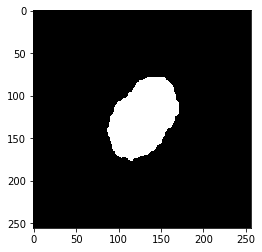

In [44]:
plt.imshow(gt[6],cmap = "gray")

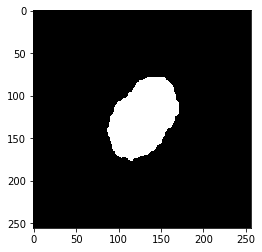

In [45]:
plt.imshow(ground_truth_images_melanoma[6], cmap = "gray")

In [47]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("/home/guru/Desktop/Cancer-Detection-and-Segmentation/others/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [48]:
filenames

['ISIC_0000000.jpg',
 'ISIC_0000001.jpg',
 'ISIC_0000003.jpg',
 'ISIC_0000006.jpg',
 'ISIC_0000007.jpg',
 'ISIC_0000008.jpg',
 'ISIC_0000009.jpg',
 'ISIC_0000010.jpg',
 'ISIC_0000011.jpg',
 'ISIC_0000012.jpg',
 'ISIC_0000014.jpg',
 'ISIC_0000015.jpg',
 'ISIC_0000016.jpg',
 'ISIC_0000017.jpg',
 'ISIC_0000018.jpg',
 'ISIC_0000019.jpg',
 'ISIC_0000020.jpg',
 'ISIC_0000021.jpg',
 'ISIC_0000023.jpg',
 'ISIC_0000024.jpg',
 'ISIC_0000025.jpg',
 'ISIC_0000027.jpg',
 'ISIC_0000028.jpg',
 'ISIC_0000032.jpg',
 'ISIC_0000034.jpg',
 'ISIC_0000037.jpg',
 'ISIC_0000038.jpg',
 'ISIC_0000039.jpg',
 'ISIC_0000041.jpg',
 'ISIC_0000042.jpg',
 'ISIC_0000044.jpg',
 'ISIC_0000045.jpg',
 'ISIC_0000047.jpg',
 'ISIC_0000048.jpg',
 'ISIC_0000050.jpg',
 'ISIC_0000051.jpg',
 'ISIC_0000052.jpg',
 'ISIC_0000053.jpg',
 'ISIC_0000055.jpg',
 'ISIC_0000057.jpg',
 'ISIC_0000059.jpg',
 'ISIC_0000061.jpg',
 'ISIC_0000062.jpg',
 'ISIC_0000063.jpg',
 'ISIC_0000064.jpg',
 'ISIC_0000065.jpg',
 'ISIC_0000066.jpg',
 'ISIC_000006

In [49]:
other_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    image = misc.imresize(image,(256,256))
    other_images.append(image)
    print(filename)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


ISIC_0000000.jpg
ISIC_0000001.jpg
ISIC_0000003.jpg
ISIC_0000006.jpg
ISIC_0000007.jpg
ISIC_0000008.jpg
ISIC_0000009.jpg
ISIC_0000010.jpg
ISIC_0000011.jpg
ISIC_0000012.jpg
ISIC_0000014.jpg
ISIC_0000015.jpg
ISIC_0000016.jpg
ISIC_0000017.jpg
ISIC_0000018.jpg
ISIC_0000019.jpg
ISIC_0000020.jpg
ISIC_0000021.jpg
ISIC_0000023.jpg
ISIC_0000024.jpg
ISIC_0000025.jpg
ISIC_0000027.jpg
ISIC_0000028.jpg
ISIC_0000032.jpg
ISIC_0000034.jpg
ISIC_0000037.jpg
ISIC_0000038.jpg
ISIC_0000039.jpg
ISIC_0000041.jpg
ISIC_0000042.jpg
ISIC_0000044.jpg
ISIC_0000045.jpg
ISIC_0000047.jpg
ISIC_0000048.jpg
ISIC_0000050.jpg
ISIC_0000051.jpg
ISIC_0000052.jpg
ISIC_0000053.jpg
ISIC_0000055.jpg
ISIC_0000057.jpg
ISIC_0000059.jpg
ISIC_0000061.jpg
ISIC_0000062.jpg
ISIC_0000063.jpg
ISIC_0000064.jpg
ISIC_0000065.jpg
ISIC_0000066.jpg
ISIC_0000067.jpg
ISIC_0000068.jpg
ISIC_0000069.jpg
ISIC_0000071.jpg
ISIC_0000072.jpg
ISIC_0000073.jpg
ISIC_0000075.jpg
ISIC_0000079.jpg
ISIC_0000080.jpg
ISIC_0000081.jpg
ISIC_0000082.jpg
ISIC_0000085.j

ISIC_0009906.jpg
ISIC_0009909.jpg
ISIC_0009911.jpg
ISIC_0009912.jpg
ISIC_0009914.jpg
ISIC_0009915.jpg
ISIC_0009917.jpg
ISIC_0009919.jpg
ISIC_0009920.jpg
ISIC_0009921.jpg
ISIC_0009923.jpg
ISIC_0009925.jpg
ISIC_0009929.jpg
ISIC_0009930.jpg
ISIC_0009931.jpg
ISIC_0009932.jpg
ISIC_0009933.jpg
ISIC_0009935.jpg
ISIC_0009936.jpg
ISIC_0009937.jpg
ISIC_0009938.jpg
ISIC_0009939.jpg
ISIC_0009940.jpg
ISIC_0009941.jpg
ISIC_0009942.jpg
ISIC_0009943.jpg
ISIC_0009945.jpg
ISIC_0009946.jpg
ISIC_0009947.jpg
ISIC_0009949.jpg
ISIC_0009951.jpg
ISIC_0009953.jpg
ISIC_0009954.jpg
ISIC_0009956.jpg
ISIC_0009958.jpg
ISIC_0009961.jpg
ISIC_0009962.jpg
ISIC_0009963.jpg
ISIC_0009964.jpg
ISIC_0009965.jpg
ISIC_0009966.jpg
ISIC_0009967.jpg
ISIC_0009968.jpg
ISIC_0009969.jpg
ISIC_0009972.jpg
ISIC_0009973.jpg
ISIC_0009974.jpg
ISIC_0009975.jpg
ISIC_0009976.jpg
ISIC_0009977.jpg
ISIC_0009979.jpg
ISIC_0009981.jpg
ISIC_0009982.jpg
ISIC_0009987.jpg
ISIC_0009991.jpg
ISIC_0009994.jpg
ISIC_0009998.jpg
ISIC_0010002.jpg
ISIC_0010003.j

ISIC_0012516.jpg
ISIC_0012517.jpg
ISIC_0012518.jpg
ISIC_0012520.jpg
ISIC_0012521.jpg
ISIC_0012523.jpg
ISIC_0012526.jpg
ISIC_0012527.jpg
ISIC_0012529.jpg
ISIC_0012539.jpg
ISIC_0012543.jpg
ISIC_0012544.jpg
ISIC_0012549.jpg
ISIC_0012550.jpg
ISIC_0012653.jpg
ISIC_0012655.jpg
ISIC_0012657.jpg
ISIC_0012658.jpg
ISIC_0012659.jpg
ISIC_0012661.jpg
ISIC_0012662.jpg
ISIC_0012663.jpg
ISIC_0012664.jpg
ISIC_0012665.jpg
ISIC_0012666.jpg
ISIC_0012669.jpg
ISIC_0012670.jpg
ISIC_0012671.jpg
ISIC_0012672.jpg
ISIC_0012673.jpg
ISIC_0012674.jpg
ISIC_0012675.jpg
ISIC_0012676.jpg
ISIC_0012677.jpg
ISIC_0012679.jpg
ISIC_0012680.jpg
ISIC_0012681.jpg
ISIC_0012682.jpg
ISIC_0012683.jpg
ISIC_0012685.jpg
ISIC_0012690.jpg
ISIC_0012692.jpg
ISIC_0012693.jpg
ISIC_0012696.jpg
ISIC_0012697.jpg
ISIC_0012699.jpg
ISIC_0012700.jpg
ISIC_0012702.jpg
ISIC_0012704.jpg
ISIC_0012706.jpg
ISIC_0012709.jpg
ISIC_0012710.jpg
ISIC_0012711.jpg
ISIC_0012713.jpg
ISIC_0012719.jpg
ISIC_0012721.jpg
ISIC_0012725.jpg
ISIC_0012726.jpg
ISIC_0012735.j

ISIC_0014438.jpg
ISIC_0014440.jpg
ISIC_0014441.jpg
ISIC_0014453.jpg
ISIC_0014458.jpg
ISIC_0014469.jpg
ISIC_0014473.jpg
ISIC_0014475.jpg
ISIC_0014490.jpg
ISIC_0014498.jpg
ISIC_0014502.jpg
ISIC_0014504.jpg
ISIC_0014511.jpg
ISIC_0014515.jpg
ISIC_0014516.jpg
ISIC_0014522.jpg
ISIC_0014526.jpg
ISIC_0014529.jpg
ISIC_0014535.jpg
ISIC_0014537.jpg
ISIC_0014547.jpg
ISIC_0014554.jpg
ISIC_0014569.jpg
ISIC_0014570.jpg
ISIC_0014571.jpg
ISIC_0014573.jpg
ISIC_0014576.jpg
ISIC_0014577.jpg
ISIC_0014578.jpg
ISIC_0014579.jpg
ISIC_0014580.jpg
ISIC_0014581.jpg
ISIC_0014582.jpg
ISIC_0014583.jpg
ISIC_0014585.jpg
ISIC_0014589.jpg
ISIC_0014591.jpg
ISIC_0014592.jpg
ISIC_0014593.jpg
ISIC_0014594.jpg
ISIC_0014595.jpg
ISIC_0014596.jpg
ISIC_0014598.jpg
ISIC_0014599.jpg
ISIC_0014602.jpg
ISIC_0014603.jpg
ISIC_0014605.jpg
ISIC_0014606.jpg
ISIC_0014607.jpg
ISIC_0014609.jpg
ISIC_0014612.jpg
ISIC_0014613.jpg
ISIC_0014615.jpg
ISIC_0014617.jpg
ISIC_0014621.jpg
ISIC_0014622.jpg
ISIC_0014625.jpg
ISIC_0014628.jpg
ISIC_0014630.j

In [50]:
for i in range(len(other_images)):
    imsave("/home/guru/Desktop/Cancer-Detection-and-Segmentation/Others_resized/" + filenames[i], other_images[i])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [52]:
np.unique(gt[0])

array([0, 1], dtype=uint8)

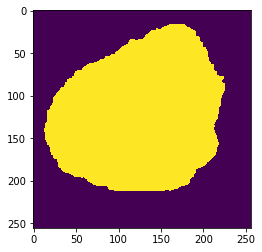

In [53]:
plt.imshow(gt[0])

In [56]:
np.save("ground_truth_resized.npy", gt)

In [55]:
root_path = ""
filenames = []
for root, dirnames, filenames in os.walk("/home/guru/Desktop/Cancer-Detection-and-Segmentation/Total_train_segmentation/"):
    filenames.sort(key = natural_keys)
    rootpath = root

In [57]:
total_images = []
for filename in filenames :
    filepath = os.path.join(root,filename)
    image = ndimage.imread(filepath)
    total_images.append(image)
    print(filename)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  after removing the cwd from sys.path.


ISIC_0000000.jpg
ISIC_0000001.jpg
ISIC_0000002.jpg
ISIC_0000003.jpg
ISIC_0000004.jpg
ISIC_0000006.jpg
ISIC_0000007.jpg
ISIC_0000008.jpg
ISIC_0000009.jpg
ISIC_0000010.jpg
ISIC_0000011.jpg
ISIC_0000012.jpg
ISIC_0000013.jpg
ISIC_0000014.jpg
ISIC_0000015.jpg
ISIC_0000016.jpg
ISIC_0000017.jpg
ISIC_0000018.jpg
ISIC_0000019.jpg
ISIC_0000020.jpg
ISIC_0000021.jpg
ISIC_0000022.jpg
ISIC_0000023.jpg
ISIC_0000024.jpg
ISIC_0000025.jpg
ISIC_0000026.jpg
ISIC_0000027.jpg
ISIC_0000028.jpg
ISIC_0000029.jpg
ISIC_0000030.jpg
ISIC_0000031.jpg
ISIC_0000032.jpg
ISIC_0000034.jpg
ISIC_0000035.jpg
ISIC_0000036.jpg
ISIC_0000037.jpg
ISIC_0000038.jpg
ISIC_0000039.jpg
ISIC_0000040.jpg
ISIC_0000041.jpg
ISIC_0000042.jpg
ISIC_0000043.jpg
ISIC_0000044.jpg
ISIC_0000045.jpg
ISIC_0000046.jpg
ISIC_0000047.jpg
ISIC_0000048.jpg
ISIC_0000049.jpg
ISIC_0000050.jpg
ISIC_0000051.jpg
ISIC_0000052.jpg
ISIC_0000053.jpg
ISIC_0000054.jpg
ISIC_0000055.jpg
ISIC_0000056.jpg
ISIC_0000057.jpg
ISIC_0000059.jpg
ISIC_0000061.jpg
ISIC_0000062.j

ISIC_0004110.jpg
ISIC_0004115.jpg
ISIC_0004166.jpg
ISIC_0004168.jpg
ISIC_0004309.jpg
ISIC_0004346.jpg
ISIC_0004715.jpg
ISIC_0004985.jpg
ISIC_0005000.jpg
ISIC_0005187.jpg
ISIC_0005548.jpg
ISIC_0005555.jpg
ISIC_0005620.jpg
ISIC_0005639.jpg
ISIC_0005666.jpg
ISIC_0005787.jpg
ISIC_0006021.jpg
ISIC_0006114.jpg
ISIC_0006193.jpg
ISIC_0006326.jpg
ISIC_0006350.jpg
ISIC_0006612.jpg
ISIC_0006711.jpg
ISIC_0006776.jpg
ISIC_0006795.jpg
ISIC_0006800.jpg
ISIC_0006940.jpg
ISIC_0006982.jpg
ISIC_0007038.jpg
ISIC_0007087.jpg
ISIC_0007322.jpg
ISIC_0007475.jpg
ISIC_0007557.jpg
ISIC_0007693.jpg
ISIC_0007760.jpg
ISIC_0008029.jpg
ISIC_0008116.jpg
ISIC_0008145.jpg
ISIC_0008207.jpg
ISIC_0008236.jpg
ISIC_0008256.jpg
ISIC_0008280.jpg
ISIC_0008294.jpg
ISIC_0008347.jpg
ISIC_0008396.jpg
ISIC_0008403.jpg
ISIC_0008406.jpg
ISIC_0008507.jpg
ISIC_0008528.jpg
ISIC_0008541.jpg
ISIC_0008552.jpg
ISIC_0008600.jpg
ISIC_0008626.jpg
ISIC_0008659.jpg
ISIC_0008785.jpg
ISIC_0008807.jpg
ISIC_0008879.jpg
ISIC_0008992.jpg
ISIC_0008993.j

ISIC_0011352.jpg
ISIC_0011353.jpg
ISIC_0011358.jpg
ISIC_0011359.jpg
ISIC_0011361.jpg
ISIC_0011362.jpg
ISIC_0011363.jpg
ISIC_0011366.jpg
ISIC_0011367.jpg
ISIC_0011372.jpg
ISIC_0011382.jpg
ISIC_0011384.jpg
ISIC_0011386.jpg
ISIC_0011387.jpg
ISIC_0011393.jpg
ISIC_0011397.jpg
ISIC_0011398.jpg
ISIC_0011402.jpg
ISIC_0012089.jpg
ISIC_0012090.jpg
ISIC_0012094.jpg
ISIC_0012097.jpg
ISIC_0012102.jpg
ISIC_0012103.jpg
ISIC_0012105.jpg
ISIC_0012107.jpg
ISIC_0012108.jpg
ISIC_0012116.jpg
ISIC_0012117.jpg
ISIC_0012118.jpg
ISIC_0012135.jpg
ISIC_0012137.jpg
ISIC_0012141.jpg
ISIC_0012148.jpg
ISIC_0012150.jpg
ISIC_0012155.jpg
ISIC_0012156.jpg
ISIC_0012164.jpg
ISIC_0012167.jpg
ISIC_0012170.jpg
ISIC_0012172.jpg
ISIC_0012173.jpg
ISIC_0012175.jpg
ISIC_0012177.jpg
ISIC_0012179.jpg
ISIC_0012182.jpg
ISIC_0012183.jpg
ISIC_0012187.jpg
ISIC_0012203.jpg
ISIC_0012205.jpg
ISIC_0012208.jpg
ISIC_0012209.jpg
ISIC_0012211.jpg
ISIC_0012212.jpg
ISIC_0012213.jpg
ISIC_0012214.jpg
ISIC_0012217.jpg
ISIC_0012224.jpg
ISIC_0012227.j

ISIC_0013844.jpg
ISIC_0013845.jpg
ISIC_0013861.jpg
ISIC_0013862.jpg
ISIC_0013864.jpg
ISIC_0013865.jpg
ISIC_0013874.jpg
ISIC_0013876.jpg
ISIC_0013879.jpg
ISIC_0013886.jpg
ISIC_0013888.jpg
ISIC_0013890.jpg
ISIC_0013896.jpg
ISIC_0013910.jpg
ISIC_0013918.jpg
ISIC_0013921.jpg
ISIC_0013922.jpg
ISIC_0013927.jpg
ISIC_0013929.jpg
ISIC_0013933.jpg
ISIC_0013935.jpg
ISIC_0013936.jpg
ISIC_0013942.jpg
ISIC_0013946.jpg
ISIC_0013958.jpg
ISIC_0013961.jpg
ISIC_0013962.jpg
ISIC_0013965.jpg
ISIC_0013967.jpg
ISIC_0013969.jpg
ISIC_0013970.jpg
ISIC_0013971.jpg
ISIC_0013972.jpg
ISIC_0013975.jpg
ISIC_0013980.jpg
ISIC_0013981.jpg
ISIC_0013982.jpg
ISIC_0013983.jpg
ISIC_0013984.jpg
ISIC_0013986.jpg
ISIC_0013995.jpg
ISIC_0013996.jpg
ISIC_0013997.jpg
ISIC_0014001.jpg
ISIC_0014004.jpg
ISIC_0014013.jpg
ISIC_0014026.jpg
ISIC_0014028.jpg
ISIC_0014029.jpg
ISIC_0014031.jpg
ISIC_0014032.jpg
ISIC_0014044.jpg
ISIC_0014045.jpg
ISIC_0014046.jpg
ISIC_0014049.jpg
ISIC_0014061.jpg
ISIC_0014062.jpg
ISIC_0014066.jpg
ISIC_0014069.j

In [58]:
total_images = np.array(total_images)

In [59]:
total_images.shape

(2000, 256, 256, 3)

In [60]:
np.save("total_images.npy",total_images)

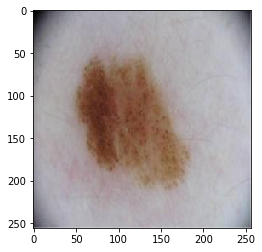

In [62]:
plt.imshow(total_images[8])

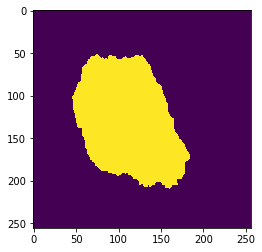

In [63]:
plt.imshow(gt[8])